In [14]:
# 特殊修改 output layer 和 database_path


import json
import numpy as np 
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras

DATASET_PATH = 'suc_ore_multi.json'
def load_data(dataset_path):
    with open(dataset_path,'r') as fp:
        data = json.load(fp)
    # convert lists into numpy arrays
    inputs = np.array(data['mfcc'])
    targets = np.array(data['labels'])

    return inputs,targets

if __name__ == '__main__':
    # load data
    inputs,targets = load_data(DATASET_PATH)
    # split the data into train and test
    inputs_train, inputs_test , targets_train, targets_test =\
        train_test_split(inputs,targets,test_size=0.3)
    # build network
    model = keras.Sequential([ 
        # input layer
        keras.layers.Flatten(input_shape=(inputs.shape[1],inputs.shape[2])),

        # 1st hidden layer
        keras.layers.Dense(512,activation='relu'),
        # 2nd hidden layer
        keras.layers.Dense(64,activation='relu'),
        # 3rd hidden layer
        keras.layers.Dense(64,activation='relu'),
        # output layer
        keras.layers.Dense(6,activation='softmax')

    ])

    # compile network
    optimizer = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, 
        loss = 'sparse_categorical_crossentropy',
        metrics = ['accuracy'])

    model.summary()

    # train network
    model.fit(inputs_train, targets_train,validation_data=(inputs_test,targets_test),\
        epochs=50,\
            batch_size=32)










Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 65)                0         
_________________________________________________________________
dense_52 (Dense)             (None, 512)               33792     
_________________________________________________________________
dense_53 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_54 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_55 (Dense)             (None, 6)                 390       
Total params: 71,174
Trainable params: 71,174
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
73/73 [==============================] - 1s 8ms/step - loss: 1.8673 - accuracy: 0.3950 - val_loss: 1.343

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 65)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               33792     
_________________________________________________________________
dense_9 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 195       
Total params: 70,979
Trainable params: 70,979
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250
37/37 [==============================] - 1s 10ms/step - loss: 5.2030 - accuracy: 0.3511 - val_loss: 2.21

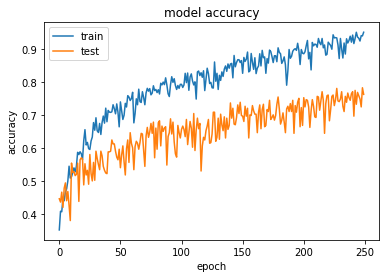

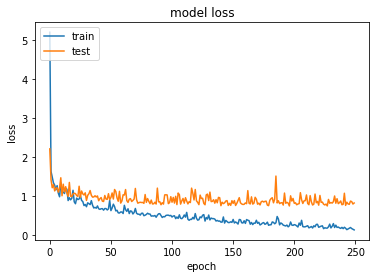

In [3]:
# version2 用于画图
# 特殊修改 output layer 和 database_path


import json
import numpy as np 
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

DATASET_PATH = 'suc_ore_multi.json'
def load_data(dataset_path):
    with open(dataset_path,'r') as fp:
        data = json.load(fp)
    # convert lists into numpy arrays
    inputs = np.array(data['mfcc'])
    targets = np.array(data['labels'])

    return inputs,targets

if __name__ == '__main__':
    # load data
    inputs,targets = load_data(DATASET_PATH)
    # split the data into train and test
    inputs_train, inputs_test , targets_train, targets_test =\
        train_test_split(inputs,targets,test_size=0.3)
    # build network
    model = keras.Sequential([ 
        # input layer
        keras.layers.Flatten(input_shape=(inputs.shape[1],inputs.shape[2])),

        # 1st hidden layer
        keras.layers.Dense(512,activation='relu'),
        # 2nd hidden layer
        keras.layers.Dense(64,activation='relu'),
        # 3rd hidden layer
        keras.layers.Dense(64,activation='relu'),
        # output layer
        keras.layers.Dense(3,activation='softmax')

    ])

    # compile network
    optimizer = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, 
        loss = 'sparse_categorical_crossentropy',
        metrics = ['accuracy'])

    model.summary()

    # train network
    history = model.fit(inputs_train, targets_train,validation_data=(inputs_test,targets_test),\
        epochs=250,\
            batch_size=32)

    # list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()







